# Homework 2

The following code shows the packages used.

In [160]:
library(readr)
library(dplyr)
library(ggplot2)

Since the file Booli_sold.csv contains data on sales of apartments in Ekhagen, we want to download the file and read it into our code. We do this with the following code, where we read the dataset and print it out with the specified columns. The specified columns are 'livingArea', 'soldPrice', 'floor', and 'location.address.streetAddress', as they are important for further questions.

In [161]:
df <- read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/Booli_sold.csv", show_col_types = FALSE) 

specified_df <- df %>% select(livingArea, soldPrice, floor, location.address.streetAddress)  

print(specified_df)

# A tibble: 158 × 4
   livingArea soldPrice floor location.address.streetAddress
        <dbl>     <dbl> <dbl> <chr>                         
 1       73     3820000    NA Åminnevägen 19                
 2       36     2355000     1 Docentbacken 9                
 3       81     6110000     3 Ekhagsvägen 5                 
 4      107     8050000     3 Torphagsvägen 4               
 5       29     2400000     3 Torphagsvägen 14              
 6      125     8950000     4 Torphagsvägen 4               
 7       79.2   4200000     1 Docentbacken 5                
 8       64.3   3300000     1 Docentbacken 3                
 9       64.3   3150000     0 Docentbacken 3                
10       96     5400000     2 Åminnevägen 17                
# ℹ 148 more rows


Since we want to add a new column to our table, we do so with the following code, where we calculate the ppsqm (price per square meter) by dividing the sold price of each apartment by its living area and add it to our table.

In [162]:
added_specified_df <- specified_df %>%
  mutate(ppsqm = soldPrice / livingArea)

print(added_specified_df)

# A tibble: 158 × 5
   livingArea soldPrice floor location.address.streetAddress  ppsqm
        <dbl>     <dbl> <dbl> <chr>                           <dbl>
 1       73     3820000    NA Åminnevägen 19                 52329.
 2       36     2355000     1 Docentbacken 9                 65417.
 3       81     6110000     3 Ekhagsvägen 5                  75432.
 4      107     8050000     3 Torphagsvägen 4                75234.
 5       29     2400000     3 Torphagsvägen 14               82759.
 6      125     8950000     4 Torphagsvägen 4                71600 
 7       79.2   4200000     1 Docentbacken 5                 53030.
 8       64.3   3300000     1 Docentbacken 3                 51322.
 9       64.3   3150000     0 Docentbacken 3                 48989.
10       96     5400000     2 Åminnevägen 17                 56250 
# ℹ 148 more rows


To show a table with the five most expensive apartments with regard to the ppsqm, we arrange the previous table in descending order of the ppsqm and only print the top five.

In [163]:
five_most_expensive <- added_specified_df %>%
  arrange(desc(ppsqm)) %>%
  head(5)

print(five_most_expensive)

# A tibble: 5 × 5
  livingArea soldPrice floor location.address.streetAddress   ppsqm
       <dbl>     <dbl> <dbl> <chr>                            <dbl>
1       24     2500000     3 Ekhagsvägen 8                  104167.
2       24     2450000     3 Ekhagsvägen 8                  102083.
3       23     2300000     1 Ekhagsvägen 10                 100000 
4       25     2210000     0 Torphagsvägen 4                 88400 
5       26.9   2300000     2 Docentbacken 1B                 85502.


The next code results in a table consisting of the average ppsqm of the apartments in Ekhagen by using the summarise function to calculate the mean of the ppsqm column. In the code, we added na.rm = TRUE to exclude missing values.

In [164]:
average_ppsqm_ekhagen <- added_specified_df %>%
  summarise(average_ppsqm = mean(ppsqm, na.rm = TRUE))

print(average_ppsqm_ekhagen)

# A tibble: 1 × 1
  average_ppsqm
          <dbl>
1        58759.


The following code has been executed to highlight an aspect of the data which I find interesting: the average ppsqm of each grouped floor. In the table, we see that it is the lowest floor (-1) that has the highest price per square meter. We can also see that the lowest price per square meter was for floor 7. I find this information to be quite surprising, since it's often the top floors that go for the highest prices, compared to the bottom floors. This often occurs because top floors have a more desired view, and so on. But in this case, the lowest floor might have a better floor plan or something along those lines, which results in them becoming more desirable to buyers. The top floors might have worse conditions, like outdated interiors.

In [165]:
floor_info <- added_specified_df %>%
  group_by(floor) %>%
  summarise(avg_ppsqm = mean(ppsqm, na.rm = TRUE))

print(floor_info)

# A tibble: 10 × 2
   floor avg_ppsqm
   <dbl>     <dbl>
 1    -1    73469.
 2     0    63286.
 3     1    61047.
 4     2    58593.
 5     3    66387.
 6     4    53012.
 7     5    52014.
 8     6    57552.
 9     7    35714.
10    NA    52636.


For our next exercise, we want to download a new file with data for the voting in the 2018 Swedish election. The following code is a bit different from before, since we use the 'read_delim' function because the data in the file is separated by ';'

In [166]:
df_second <- read_delim("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/2018_R_per_kommun.csv", delim = ';', show_col_types = FALSE)

print(df_second)

# A tibble: 290 × 45
   LÄNSKOD KOMMUNKOD LÄNSNAMN     KOMMUNNAMN     M     C     L    KD     S     V
     <dbl>     <dbl> <chr>        <chr>      <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1       1        14 Stockholms … Upplands …  2311   626   566   671  2697   801
 2       1        15 Stockholms … Vallentuna  2829  1011   773   758  1891   447
 3       1        17 Stockholms … Österåker   2968   935   748   713  1971   497
 4       1        20 Stockholms … Värmdö      2749   976    64   589  2048   602
 5       1        23 Stockholms … Järfälla    2396   631   604   629  2768   875
 6       1        25 Stockholms … Ekerö       2812  1124   764   785  1717   476
 7       1        26 Stockholms … Huddinge    2407   752   614   535   261   863
 8       1        27 Stockholms … Botkyrka    1852   519   439   813  3234   985
 9       1        28 Stockholms … Salem       2484   761   758   798  2307   598
10       1        36 Stockholms … Haninge     2294   606   511   536  2729   799
# ℹ 280

In the exercise, we want to print out a table for all the legitimate votes in Stockholm. In other words, sum up the number of legitimate votes for all municipalities in Stockholm. We accomplish this by filtering the dataset for entries that correspond to Stockholm, which should be found in the 'LÄNSNAMN' column. We then sum up all the legitimate votes by looking at the 'RÖSTER GILTIGA' column. 

In [167]:
stockholm_votes <- df_second %>%
  filter(grepl("Stockholm", LÄNSNAMN, ignore.case = TRUE)) %>%
  summarise(total_legitimate_votes = sum(`RÖSTER GILTIGA`, na.rm = TRUE))

print(stockholm_votes)

# A tibble: 1 × 1
  total_legitimate_votes
                   <dbl>
1                1426237


The code below is made to calculate the percentage of legitimate votes the Social Democratic Party (S) gathered in each municipality in the election. The code therefore divides the party's votes by the legitimate votes and multiplies it by 100. It then arranges the percentages in descending order and only prints the highest percentage.

In [168]:
s_top_municipality_votes <- df_second %>%
  mutate(s_percentage = (`S` / `RÖSTER GILTIGA`) * 100) %>%
  arrange(desc(s_percentage)) %>%
  head(1)  

print(s_top_municipality_votes)

# A tibble: 1 × 46
  LÄNSKOD KOMMUNKOD LÄNSNAMN      KOMMUNNAMN     M     C     L    KD     S     V
    <dbl>     <dbl> <chr>         <chr>      <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1      24        25 Västerbotten… Dorotea      616  1488    36   488  4378  1064
# ℹ 36 more variables: MP <chr>, SD <dbl>, FI <chr>, AfS <chr>, BASIP <chr>,
#   CSIS <chr>, DD <chr>, DjuP <chr>, EAP <chr>, ENH <chr>, FHS <chr>,
#   Gup <dbl>, INI <chr>, KLP <chr>, KrVP <chr>, LPo <chr>, MED <chr>,
#   NMR <chr>, NORRP <chr>, NYREF <chr>, PP <chr>, RNP <chr>, `S-FRP` <chr>,
#   SKP <chr>, SKÅ <chr>, TRP <chr>, `VL-S` <chr>, ÖVR <chr>, OGEJ <chr>,
#   BLANK <chr>, OG <chr>, `RÖSTER GILTIGA` <dbl>, RÖSTANDE <dbl>,
#   RÖSTBERÄTTIGADE <dbl>, VALDELTAGANDE <dbl>, s_percentage <dbl>


The following code arranges the municipalities by the number of voter participants in descending order. It also uses the select and head functions to only show the top three municipality names and the corresponding number of voter participants.

In [155]:
top_three_municipality_votes <- df_second %>%
  arrange(desc(`VALDELTAGANDE`)) %>%
  select(KOMMUNNAMN, VALDELTAGANDE) %>%
  head(3) 

print(top_three_municipality_votes)

# A tibble: 3 × 2
  KOMMUNNAMN VALDELTAGANDE
  <chr>              <dbl>
1 Lomma               9386
2 Habo                9335
3 Vellinge            9313


In this code we download a new file which contains data about stroke cases and information about the individuals it pertains.

In [169]:
df_third <- read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv", show_col_types = FALSE)

print(df_third)

# A tibble: 5,110 × 12
      id gender   age hypertension heart_disease ever_married work_type    
   <dbl> <chr>  <dbl>        <dbl>         <dbl> <chr>        <chr>        
 1  9046 Male      67            0             1 Yes          Private      
 2 51676 Female    61            0             0 Yes          Self-employed
 3 31112 Male      80            0             1 Yes          Private      
 4 60182 Female    49            0             0 Yes          Private      
 5  1665 Female    79            1             0 Yes          Self-employed
 6 56669 Male      81            0             0 Yes          Private      
 7 53882 Male      74            1             1 Yes          Private      
 8 10434 Female    69            0             0 No           Private      
 9 27419 Female    59            0             0 Yes          Private      
10 60491 Female    78            0             0 Yes          Private      
# ℹ 5,100 more rows
# ℹ 5 more variables: Residence_type <chr>, a

For the last exercise, we visualized the data to be able to form a conclusion to the following question: 'Is there a correlation between smoking and stroke occurrences?' In our code, we used the ggplot function to visualize the relationship between smoking status and stroke status. The aes(x = smoking_status, fill = as.factor(stroke)) argument sets smoking status on the x-axis and fills the bars based on stroke status (0 or 1). The geom_bar(position = "dodge") function separates the bars for better comparison, showing stroke and no-stroke individuals side by side. The labs() function labels the axes and the legend: 'Smoking Status' for the x-axis, 'Count' for the y-axis, and 'Stroke Status' for the color legend. Lastly, we applied theme_minimal() for a clean design.

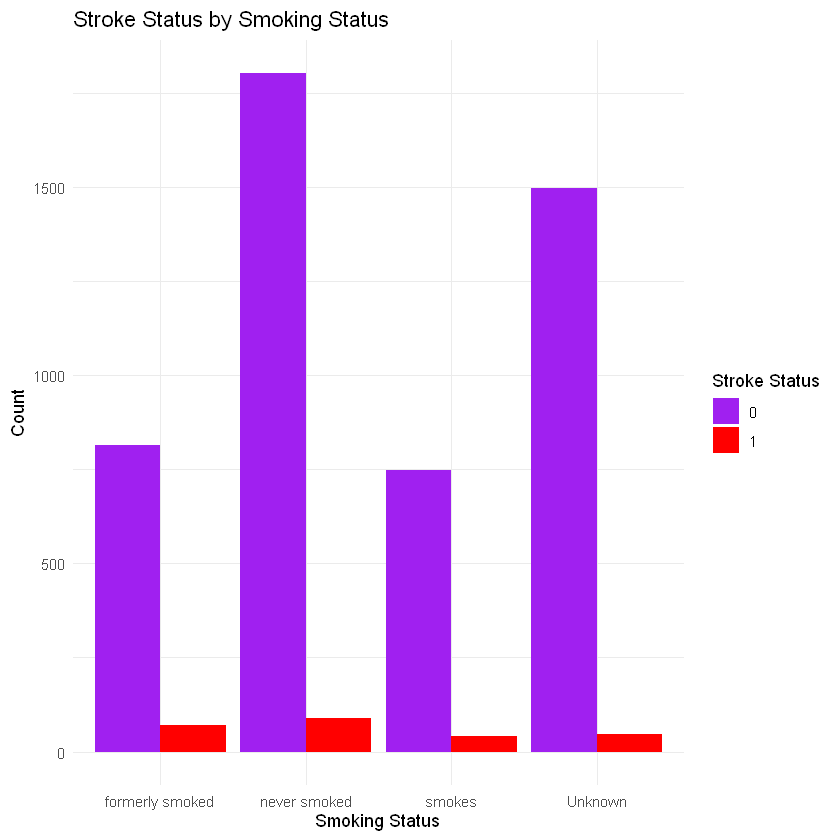

In [170]:
ggplot(df_third, aes(x = smoking_status, fill = as.factor(stroke))) +
  geom_bar(position = "dodge") +
  scale_fill_manual(values = c("purple", "red")) +  # Custom colors
  labs(title = "Stroke Status by Smoking Status",
       x = "Smoking Status",
       y = "Count",
       fill = "Stroke Status") +
  theme_minimal()

From the plot, we can see that for all smoking categories, the number of people who have not had a stroke (the purple bars) is much higher than the number who have had a stroke (the red bars). In the visualized data, we can see that people in the 'Never Smoked' group have the largest proportion of individuals who have not had a stroke. This could suggest that smoking might be a factor contributing to the risk of having a stroke. However, the numbers are still relatively low overall, which could suggest that stroke occurrence is influenced by various factors, not just smoking.

So the conclusion from this is that smoking could be a contributing factor to strokes, but the data shows that even those who regularly smoke or occasionally smoke do not necessarily have a much higher chance of having a stroke.